In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso


from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from joblib import dump, load

## Lade Daten

In [20]:
check = pd.read_excel("../10_DM/Historical 2010-2021/original3.xlsx")
df = pd.read_excel("MASTER_TEST.xlsx", skiprows=1)
df.head()

,Year,Quater,Country,PC_B2B,PC_B2C,LH_B2B,LH_B2C,Number_Brokers,Number_Salesmen,Number_Tied_Agents,...,Net_Invests_Total,Share_TV,Share_Print,Share_OOH,Share_Radio,Share_Search,Share_Social,Share_of_Advertising,Consideration,Purchase_Intent
0,2020,Q1,Brazil,0.0,197982.000000,0,0,15859,0.0,0.0,...,4.863391e+05,0.425017,0.000000,0.304143,0.06221,0.024420,0.022781,0.106221,1.006678,0.275090
1,2020,Q1,France,54974.0,251457.000000,0,0,0,963.0,1789.0,...,1.889500e+06,0.112199,0.095871,0.000000,0.00000,0.648542,0.102794,0.011659,8.391027,2.938886
2,2020,Q1,Germany,318610.0,753875.445485,0,0,0,3614.0,8124.0,...,9.082307e+06,0.314228,0.016108,0.022527,0.00000,0.292802,0.063124,0.089195,20.013168,7.577753
3,2020,Q1,Italy,56541.0,312076.000000,0,0,0,21850.0,2389.0,...,4.573274e+06,0.953244,0.001550,0.000000,0.00000,0.015743,0.003706,0.334067,12.645906,5.183672
4,2020,Q1,Spain,17636.0,272872.000000,0,0,4785,0.0,5625.0,...,1.501930e+06,0.425124,0.100962,0.000000,0.00000,0.163220,0.029465,0.017482,8.540629,2.021611


## Datenmanagement

In [21]:
df["pol_total"] = df.PC_B2B + df.PC_B2C + df.LH_B2B + df.LH_B2C
df["lh_anteil"] = (df.LH_B2B + df.LH_B2C) / df.pol_total

## Modelle laden

In [22]:
q_modell = load('quaterly_model.joblib')
scaler = load('rescale60to50.joblib')

## Vektoren definieren & Prediciton

In [23]:
use_cols = ['Net_Invests_Total',  "Share_TV", "Number_Tied_Agents", 'lh_anteil']
X = df[use_cols].values

In [24]:
pred60 = q_modell.predict(X)
pred50 = scaler.predict(pred60.reshape(-1, 1))

In [32]:
out = df.copy()
out["Policies_60"] = pred60
out["Policies_50"] = pred50
out[["Year", "Quater", "Country", "Policies_60", "Policies_50"]].to_excel("Prediciton_test.xlsx", index=False)

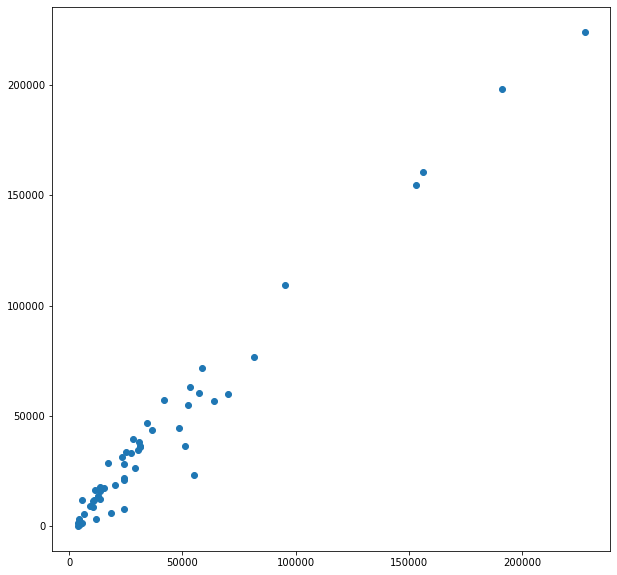

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(out.policies_50, check.target_50, label= "Random Forest")